<a href="https://colab.research.google.com/github/swarupyeole11/ML_Journey/blob/main/PredictiveAnalysisCourseProjectTaskA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np

#Reading The Data and Analyzing the data

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Predictive/snsdata.csv')
print(df.head()) # to print the first few rows of the dataset
print(df.shape) # to print the dimensions of the dataset
print(df.dtypes) # to print the data types of the columns

   gradyear gender     age  friends  basketball  football  soccer  softball  \
0      2006      M  18.982        7           0         0       0         0   
1      2006      F  18.801        0           0         1       0         0   
2      2006      M  18.335       69           0         1       0         0   
3      2006      F  18.875        0           0         0       0         0   
4      2006    NaN  18.995       10           0         0       0         0   

   volleyball  swimming  ...  blonde  mall  shopping  clothes  hollister  \
0           0         0  ...       0     0         0        0          0   
1           0         0  ...       0     1         0        0          0   
2           0         0  ...       0     0         0        0          0   
3           0         0  ...       0     0         0        0          0   
4           0         0  ...       0     0         2        0          0   

   abercrombie  die  death  drunk  drugs  
0            0    0      

#Find out features which contain missing values

In [45]:

# Identify the features with missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

gender    2724
age       5086
dtype: int64


#Replacing the outlier values with nan

In [46]:
# Replace outlier values with missing values (NaN)
df.loc[(df['age'] < 13) | (df['age'] > 20), 'age'] = np.nan
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


#Data Preperation

In [47]:
# Replace missing values in the 'gender' feature with 'No_gender'
df['gender'].fillna(value='No_gender', inplace=True)

# Create three categories using dummy coding
df = pd.get_dummies(df, columns=['gender'], prefix='', prefix_sep='')

df

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M,No_gender
0,2006,18.982,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,18.801,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,18.335,69,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2006,18.875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,18.995,10,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,16.115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,2009,15.792,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29997,2009,15.784,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29998,2009,16.378,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
#Handling missing value- age
# Group the data by 'gradyear' and calculate the mean of the 'age' feature
age_means = df.groupby('gradyear')['age'].mean()

# Replace missing values with the mean of the corresponding 'gradyear' group
for index, row in df.iterrows():
    if pd.isna(row['age']):
        df.at[index, 'age'] = age_means[row['gradyear']]


age_means

gradyear
2006    18.655858
2007    17.706172
2008    16.767701
2009    15.819573
Name: age, dtype: float64

#creating dataset by dropping the first four features of the data 

In [49]:
# Drop the first 4 features
new_data = df.drop(['gradyear', 'F', 'M','No_gender','age', 'friends'], axis=1)
new_data

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Standardizing the whole dataset


In [59]:
from sklearn.preprocessing import StandardScaler
# Standardize the dataset
scaler = StandardScaler()
data_std = scaler.fit_transform(df)
data_std

array([[-1.34164079,  1.52799993, -0.63452768, ..., -1.66597855,
         2.17828495, -0.31601901],
       [-1.34164079,  1.36947862, -0.8261496 , ...,  0.60024783,
        -0.45907676, -0.31601901],
       [-1.34164079,  0.96135194,  1.06269499, ..., -1.66597855,
         2.17828495, -0.31601901],
       ...,
       [ 1.34164079, -1.2728351 , -0.8261496 , ..., -1.66597855,
         2.17828495, -0.31601901],
       [ 1.34164079, -0.75260496, -0.8261496 , ..., -1.66597855,
         2.17828495, -0.31601901],
       [ 1.34164079,  1.30204138, -0.74402592, ...,  0.60024783,
        -0.45907676, -0.31601901]])

#Applying diffrent clustering algorithms

In [54]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data_std)

# Apply agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(data_std)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_std)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


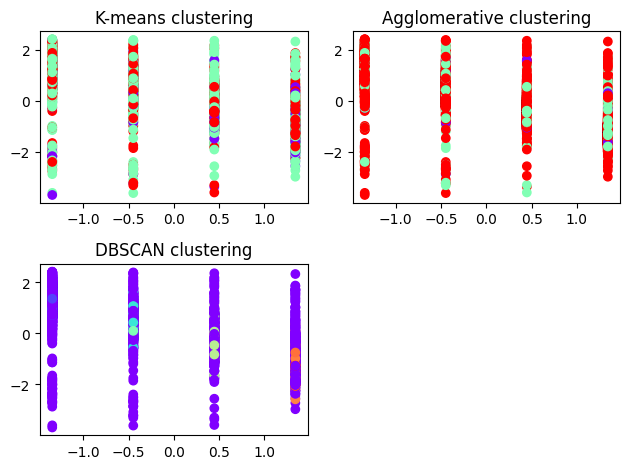

In [57]:
import matplotlib.pyplot as plt
# K-means clustering
plt.subplot(2,2,1)
plt.scatter(data_std[:,0], data_std[:,1], c=kmeans_labels, cmap='rainbow')
plt.title('K-means clustering')

# Agglomerative clustering
plt.subplot(2,2,2)
plt.scatter(data_std[:,0], data_std[:,1], c=agg_labels, cmap='rainbow')
plt.title('Agglomerative clustering')

# DBSCAN clustering
plt.subplot(2,2,3)
plt.scatter(data_std[:,0], data_std[:,1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN clustering')

plt.tight_layout()
plt.show()